In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_excel("C:\\Users\\warlo\\Downloads\\Project1_Kenneth Pieterson.xlsx")
df

,InvoiceNo,Supplier,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Currency,Country,Amount,AMT (WHOLE)
0,536365,Computer & Co,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,GBP,United Kingdom,15.30,15.30
1,536365,Computer & Co,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,GBP,United Kingdom,20.34,20.34
2,536365,Computer & Co,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,GBP,United Kingdom,22.00,22.00
3,536365,Computer & Co,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,GBP,United Kingdom,20.34,20.34
4,536365,Computer & Co,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,GBP,United Kingdom,20.34,20.34
...,...,...,...,...,...,...,...,...,...,...,...
1232,536532,Office Supplies,PLASTERS IN TIN SKULLS,24,2010-12-01 13:24:00,1.65,12433,NOK,Norway,39.60,39.60
1233,536532,Office Supplies,PLASTERS IN TIN SPACEBOY,24,2010-12-01 13:24:00,1.65,12433,NOK,Norway,39.60,39.60
1234,536532,Office Supplies,MINI JIGSAW DINOSAUR,24,2010-12-01 13:24:00,0.42,12433,NOK,Norway,10.08,10.08
1235,536532,Office Supplies,MINI JIGSAW SPACEBOY,24,2010-12-01 13:24:00,0.42,12433,NOK,Norway,10.08,10.08


In [63]:
#4.a
df.shape[1]

11

In [75]:
df.columns

Index(['InvoiceNo', 'Supplier', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Currency', 'Country', 'Amount',
       'AMT (WHOLE)'],
      dtype='object')

In [76]:

df.shape[0]

1204

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204 entries, 0 to 1236
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1204 non-null   int64         
 1   Supplier     1204 non-null   object        
 2   Description  1204 non-null   object        
 3   Quantity     1204 non-null   int64         
 4   InvoiceDate  1204 non-null   datetime64[ns]
 5   UnitPrice    1204 non-null   float64       
 6   CustomerID   1204 non-null   int64         
 7   Currency     1204 non-null   object        
 8   Country      1204 non-null   object        
 9   Amount       1204 non-null   float64       
 10  AMT (WHOLE)  1204 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 112.9+ KB


PART ONE

In [78]:

df.drop_duplicates(inplace=True)

In [79]:

numeric_cols = df.select_dtypes(include='number')
nonnumeric_cols = df.select_dtypes(include='object')

In [80]:

for cols in df.columns:
    percentage_missing = np.mean(df[cols].isnull())
    print('{} - {}%'.format (cols, round(percentage_missing*100)))

InvoiceNo - 0%
Supplier - 0%
Description - 0%
Quantity - 0%
InvoiceDate - 0%
UnitPrice - 0%
CustomerID - 0%
Currency - 0%
Country - 0%
Amount - 0%
AMT (WHOLE) - 0%


In [81]:

def impute_with_median(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        missing_percentage = df[column].isnull().mean() * 100

        if missing_percentage < 2:
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
    return df
df = impute_with_median(df)

In [82]:

def impute_with_mode(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        missing_percentage = df[column].isnull().mode()

        if missing_percentage >= 5:
            mode_value = df[column].mode().iloc[0]
            df[column].fillna(mode_value, inplace=True)
    return df
df = impute_with_mode(df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [83]:

def impute_non_numeric_with_placeholder(df, placeholder='NA'):
    for column in df.select_dtypes(exclude=[np.number]).columns:
        missing_percentage = df[column].isnull().mean() * 100

        if missing_percentage < 5:
            df[column].fillna(placeholder, inplace=True)
    return df

df = impute_non_numeric_with_placeholder(df)

In [84]:

def fill_missing_categoricals(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            missing_count = df[column].isnull().sum()
            total_count = df[column].shape[0]
            missing_percent = (missing_count / total_count)*100

            if missing_percent > 5:
                mode = df[column].mode()[0]
                df[column].fillna(mode, inplace=True)
        return df

df = fill_missing_categoricals(df)
df

,InvoiceNo,Supplier,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Currency,Country,Amount,AMT (WHOLE)
0,536365,Supplier,Description,6,2010-12-01 08:26:00,2.55,17850,Currency,Country,15.30,15.30
1,536365,Supplier,Description,6,2010-12-01 08:26:00,3.39,17850,Currency,Country,20.34,20.34
2,536365,Supplier,Description,8,2010-12-01 08:26:00,2.75,17850,Currency,Country,22.00,22.00
5,536365,Supplier,Description,2,2010-12-01 08:26:00,7.65,17850,Currency,Country,15.30,15.30
6,536365,Supplier,Description,6,2010-12-01 08:26:00,4.25,17850,Currency,Country,25.50,25.50
...,...,...,...,...,...,...,...,...,...,...,...
1227,536532,Supplier,Description,8,2010-12-01 13:24:00,2.10,12433,Currency,Country,16.80,16.80
1228,536532,Supplier,Description,8,2010-12-01 13:24:00,1.95,12433,Currency,Country,15.60,15.60
1229,536532,Supplier,Description,24,2010-12-01 13:24:00,1.65,12433,Currency,Country,39.60,39.60
1230,536532,Supplier,Description,36,2010-12-01 13:24:00,1.65,12433,Currency,Country,59.40,59.40


In [85]:

object_col = df.columns[df.dtypes == 'object']
df[object_col] = object_col.fillna('MISSING')

num_cols = df.select_dtypes(include=['int','float'])
df[num_cols.columns] = num_cols.fillna(0)
df

,InvoiceNo,Supplier,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Currency,Country,Amount,AMT (WHOLE)
0,536365,Supplier,Description,6,2010-12-01 08:26:00,2.55,17850,Currency,Country,15.30,15.30
1,536365,Supplier,Description,6,2010-12-01 08:26:00,3.39,17850,Currency,Country,20.34,20.34
2,536365,Supplier,Description,8,2010-12-01 08:26:00,2.75,17850,Currency,Country,22.00,22.00
5,536365,Supplier,Description,2,2010-12-01 08:26:00,7.65,17850,Currency,Country,15.30,15.30
6,536365,Supplier,Description,6,2010-12-01 08:26:00,4.25,17850,Currency,Country,25.50,25.50
...,...,...,...,...,...,...,...,...,...,...,...
1227,536532,Supplier,Description,8,2010-12-01 13:24:00,2.10,12433,Currency,Country,16.80,16.80
1228,536532,Supplier,Description,8,2010-12-01 13:24:00,1.95,12433,Currency,Country,15.60,15.60
1229,536532,Supplier,Description,24,2010-12-01 13:24:00,1.65,12433,Currency,Country,39.60,39.60
1230,536532,Supplier,Description,36,2010-12-01 13:24:00,1.65,12433,Currency,Country,59.40,59.40


In [33]:

def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound) | df[column].isnull()]
        
    return df

df = remove_outliers(df)


PART 2

In [34]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount,AMT (WHOLE)
count,1123.000000,1123.000000,1123,1123.000000,1123.000000,1123.000000,1123.000000
mean,536442.733749,6.605521,2010-12-01 11:43:02.724844288,2.875548,15775.538736,12.613304,12.613304
min,536365.000000,1.000000,2010-12-01 08:26:00,0.120000,12431.000000,0.290000,0.290000
25%,536401.000000,1.000000,2010-12-01 11:21:00,1.250000,14307.000000,3.115000,3.115000
50%,536415.000000,3.000000,2010-12-01 11:57:00,1.950000,15862.000000,8.850000,8.850000
75%,536520.000000,8.000000,2010-12-01 12:43:00,3.750000,17897.000000,17.700000,17.700000
max,536532.000000,96.000000,2010-12-01 13:24:00,18.000000,18085.000000,68.000000,68.000000
std,55.823900,9.060317,NaN,2.556528,1844.760855,12.187176,12.187176


In [37]:

numeric_cols.mean()

InvoiceNo      536441.326412
Quantity           11.918605
UnitPrice           3.102625
CustomerID      15772.191030
Amount             23.096088
AMT (WHOLE)        23.096088
dtype: float64

In [38]:

numeric_cols.median()

InvoiceNo      536415.0
Quantity            4.0
UnitPrice           2.1
CustomerID      15862.0
Amount             10.2
AMT (WHOLE)        10.2
dtype: float64

In [39]:

numeric_cols.mode()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Amount,AMT (WHOLE)
0,536464,1,1.25,17850,15.0,15.0


In [40]:

numeric_cols.std()

InvoiceNo        55.865864
Quantity         35.299550
UnitPrice         5.525798
CustomerID     1836.905873
Amount           69.038912
AMT (WHOLE)      69.038912
dtype: float64

In [42]:

def calculate_ranges(df):
    ranges = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        min_value = df[column].min()
        max_value = df[column].max()
        column_range = max_value - min_value
        ranges[column] = column_range

    return ranges


numeric_ranges = calculate_ranges(df)
numeric_ranges

{'InvoiceNo': 167,
 'Quantity': 95,
 'UnitPrice': 17.88,
 'CustomerID': 5654,
 'Amount': 67.71,
 'AMT (WHOLE)': 67.71}

In [52]:

def calculate_iqr(df):
    iqrs = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        q3,q1 = np.percentile(df[column],[75,25])
        iqr= q3-q1
        iqrs[column] = iqr

    return iqrs
calculate_iqr(df)

{'InvoiceNo': 119.0,
 'Quantity': 7.0,
 'UnitPrice': 2.5,
 'CustomerID': 3590.0,
 'Amount': 14.584999999999999,
 'AMT (WHOLE)': 14.585000000000003}

In [53]:

def find_modes_for_non_numeric_columns(df):
    modes = {}
    for column in df.select_dtypes(exclude=[np.number]).columns:
        mode_value = df[column].mode().iloc[0]
        modes[column] = mode_value

    return modes

modes_non_numeric = find_modes_for_non_numeric_columns(df)
modes_non_numeric

{'Supplier': 'Supplier',
 'Description': 'Description',
 'InvoiceDate': Timestamp('2010-12-01 12:23:00'),
 'Currency': 'Currency',
 'Country': 'Country'}

In [55]:

def find_unique_values_for_non_numeric_columns(df):
    unique_values = {}
    for column in df.select_dtypes(exclude=[np.number]).columns:
        unique_vals = df[column].unique()
        unique_values[column] = list(unique_vals)
    return unique_values


unique_values_non_numeric = find_unique_values_for_non_numeric_columns(df)
unique_values_non_numeric

{'Supplier': ['Supplier'],
 'Description': ['Description'],
 'InvoiceDate': [Timestamp('2010-12-01 08:26:00'),
  Timestamp('2010-12-01 08:28:00'),
  Timestamp('2010-12-01 08:34:00'),
  Timestamp('2010-12-01 08:35:00'),
  Timestamp('2010-12-01 08:45:00'),
  Timestamp('2010-12-01 09:01:00'),
  Timestamp('2010-12-01 09:02:00'),
  Timestamp('2010-12-01 09:32:00'),
  Timestamp('2010-12-01 09:34:00'),
  Timestamp('2010-12-01 09:37:00'),
  Timestamp('2010-12-01 09:41:00'),
  Timestamp('2010-12-01 09:45:00'),
  Timestamp('2010-12-01 09:53:00'),
  Timestamp('2010-12-01 09:56:00'),
  Timestamp('2010-12-01 09:59:00'),
  Timestamp('2010-12-01 10:03:00'),
  Timestamp('2010-12-01 10:19:00'),
  Timestamp('2010-12-01 10:29:00'),
  Timestamp('2010-12-01 10:39:00'),
  Timestamp('2010-12-01 10:47:00'),
  Timestamp('2010-12-01 10:51:00'),
  Timestamp('2010-12-01 10:52:00'),
  Timestamp('2010-12-01 10:53:00'),
  Timestamp('2010-12-01 11:21:00'),
  Timestamp('2010-12-01 11:27:00'),
  Timestamp('2010-12-01 1

PART 3

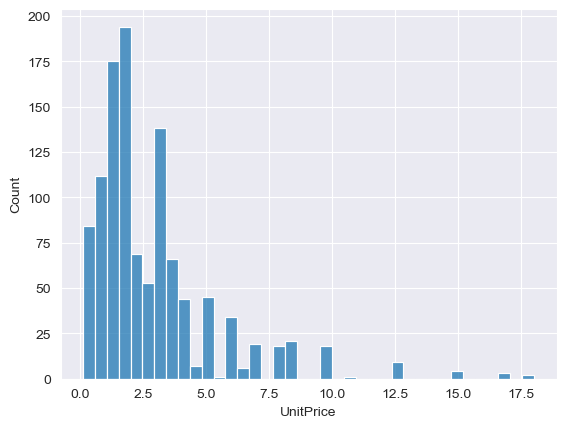

In [57]:
sns.histplot(df['UnitPrice']);

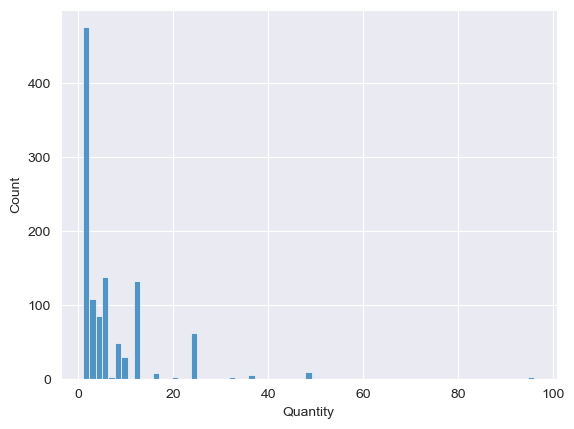

In [58]:
sns.histplot(df['Quantity']);

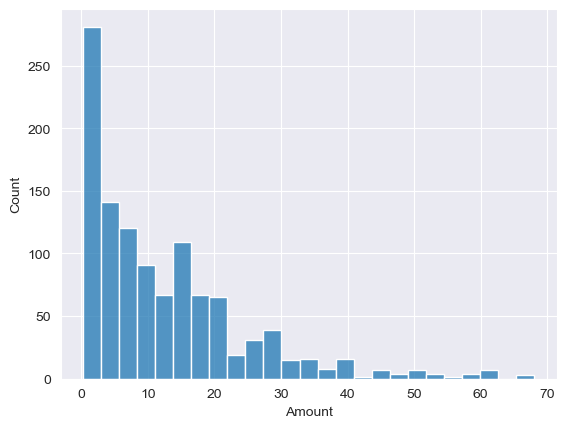

In [59]:
sns.histplot(df['Amount']);